# Titanic Survival Prediction - Lab 3
## Kersha Broussard  
### March 18, 2025  

This notebook explores the Titanic dataset and applies machine learning models to predict passenger survival. We will handle missing data, engineer new features, and compare different classification models.


## Section 1. Import and Inspect the Data

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Load Titanic dataset
titanic = sns.load_dataset('titanic')


## Section 2. Data Exploration and Preparation

#### 2.1 Handle Missing Values and Clean Data

In [15]:
# Fill missing age values with median
titanic.loc[:, 'age'] = titanic['age'].fillna(titanic['age'].median())

In [16]:
# Fill missing embark_town values with mode
titanic.loc[:, 'embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

#### 2.2 Feature Engineering

#### Created family_size

In [3]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1


#### Converted categorical sex into numeric

In [5]:
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})


#### Converted categorical embarked into numeric

In [6]:
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})


#### Converted alone into binary

In [8]:
titanic['alone'] = titanic['alone'].astype(int)

#### Check If These Columns Exist

In [9]:
print(titanic.head())


   survived  pclass  sex   age  sibsp  parch     fare  embarked  class    who  \
0         0       3    0  22.0      1      0   7.2500       NaN  Third    man   
1         1       1    1  38.0      1      0  71.2833       NaN  First  woman   
2         1       3    1  26.0      0      0   7.9250       NaN  Third  woman   
3         1       1    1  35.0      1      0  53.1000       NaN  First  woman   
4         0       3    0  35.0      0      0   8.0500       NaN  Third    man   

   adult_male deck  embark_town alive  alone  family_size  
0        True  NaN  Southampton    no      0            2  
1       False    C    Cherbourg   yes      0            2  
2       False  NaN  Southampton   yes      1            1  
3       False    C  Southampton   yes      0            2  
4        True  NaN  Southampton    no      1            1  


### Section 3. Feature Selection and Justification

#### 3.1 Choose features and target

#### First:

** input features: alone
** target: survived

#### Second:

** input features - age 
** target: survived

#### Third:

** input features -  age and family_size 
** target: survived

#### 3.2 Define X (features) and y (target)

In [17]:
# Case 1: alone only 
X = titanic[['alone']]
y = titanic['survived']

# Case 2: age only
# X = titanic[['age']]
# y = titanic['survived']

# Case 3: age + family_size
# X = titanic[['age', 'family_size']]
# y = titanic['survived']


### Section 4. Train a Classification Model (Decision Tree)
 

4.1 Split the Data

#### Decision Tree Model

In [19]:
# Select features and target
X = titanic[['alone', 'age', 'family_size']]  
y = titanic['survived']  # Target variable


In [20]:
from sklearn.model_selection import train_test_split

# 80% training, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)


#### 4.2 Create and Train Model (Decision Tree)

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit the model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

print("Decision Tree Model trained successfully!")


Decision Tree Model trained successfully!


In [22]:
print("Training set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)


Training set size: (712, 3) (712,)
Test set size: (179, 3) (179,)


#### 4.3 Predict and Evaluate Model Performance

In [23]:
y_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_pred))


Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       110
           1       0.46      0.35      0.40        69

    accuracy                           0.59       179
   macro avg       0.55      0.55      0.54       179
weighted avg       0.57      0.59      0.58       179



#### 4.4 Report Confusion Matrix (as a heatmap)

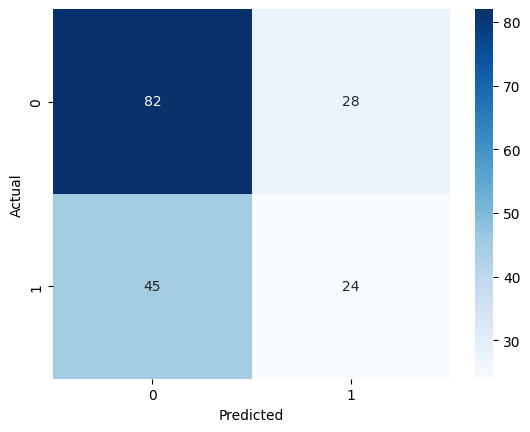

In [26]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### 4.5 Report Decision Tree Plot

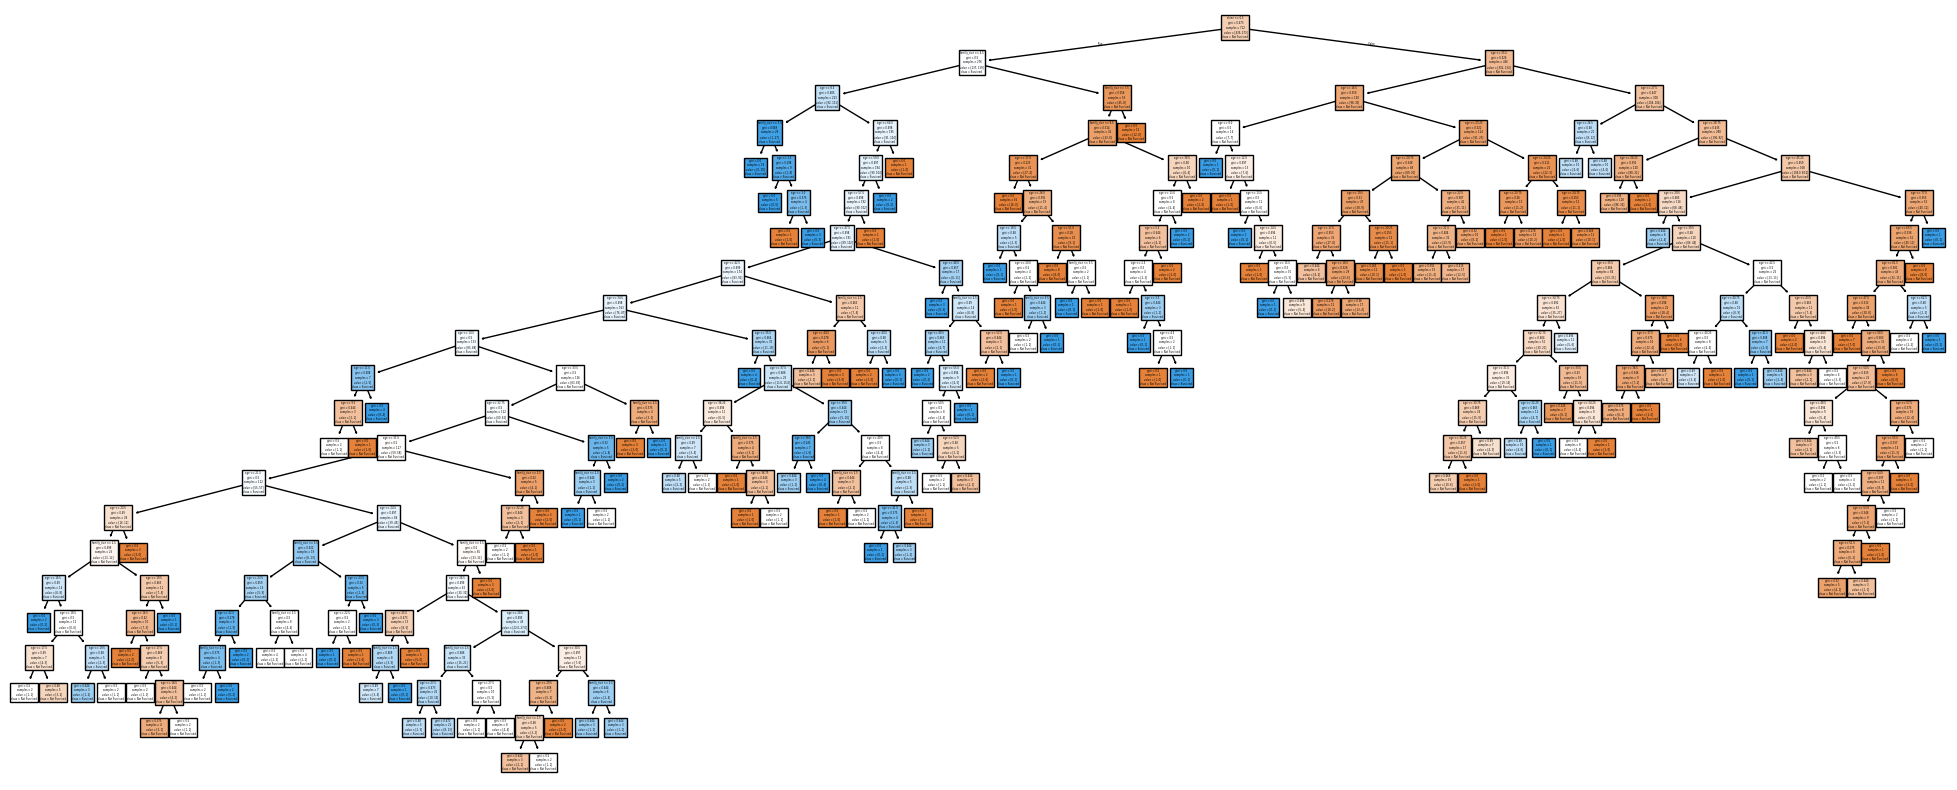

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set figure size for better visibility
plt.figure(figsize=(25,10))

# Plot the decision tree
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)

# Show the plot
plt.show()


#### Case 1: Using height as the Only Input

Results for Decision Tree (Age Only):
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



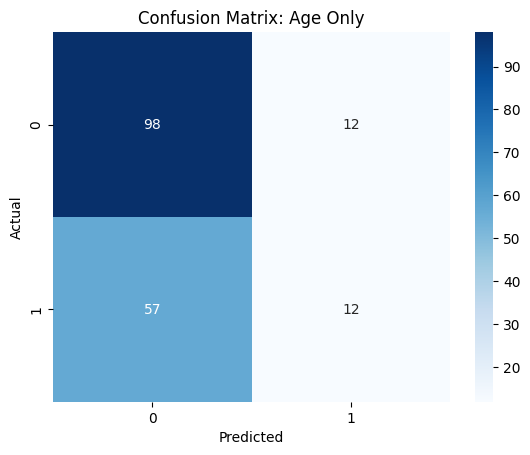

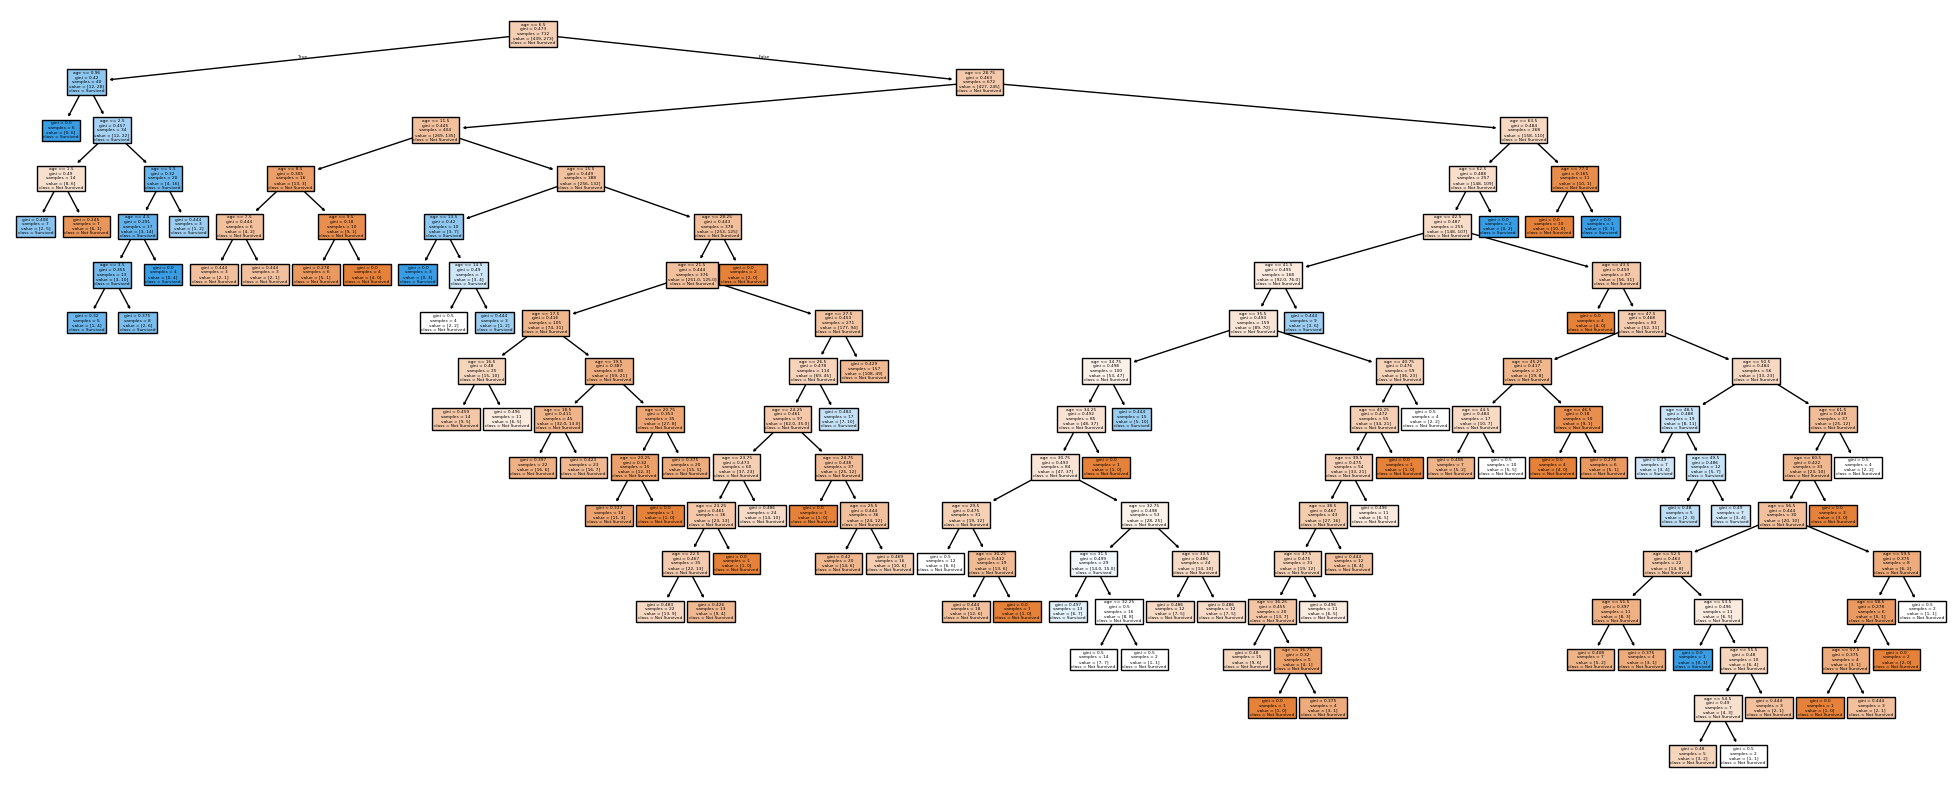

In [28]:
# Case 1: age only
X = titanic[['age']]
y = titanic['survived']

# Train/Test Split
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

# Train Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Evaluate Performance
y_pred = tree_model.predict(X_test)
print("Results for Decision Tree (Age Only):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix: Age Only")
plt.show()

# Decision Tree Plot
plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()



#### Case 2: Using fare as the Only Input

Results for Decision Tree (Fare Only):
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       110
           1       0.58      0.48      0.52        69

    accuracy                           0.66       179
   macro avg       0.64      0.63      0.63       179
weighted avg       0.66      0.66      0.66       179



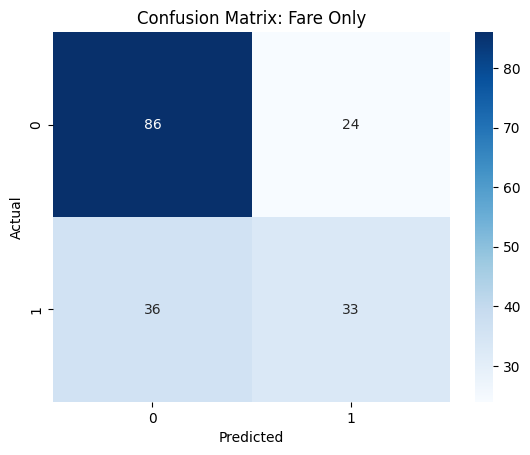

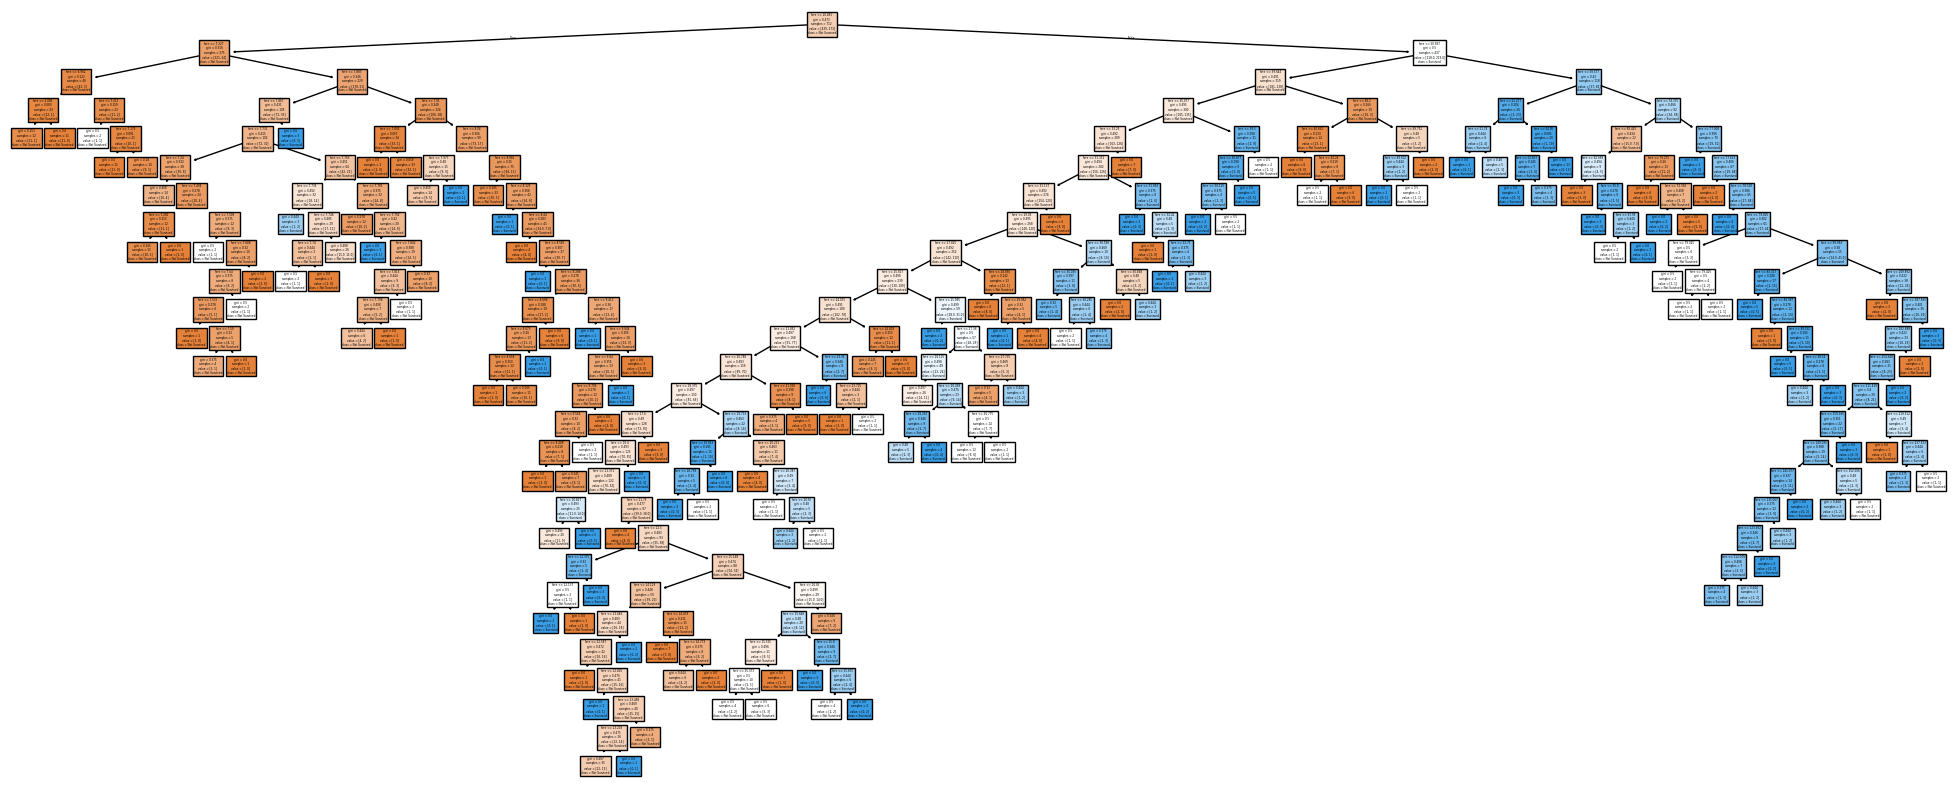

In [29]:
# Case 2: fare only
X = titanic[['fare']]
y = titanic['survived']

# Train/Test Split
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

# Train Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Evaluate Performance
y_pred = tree_model.predict(X_test)
print("Results for Decision Tree (Fare Only):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix: Fare Only")
plt.show()

# Decision Tree Plot
plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()


#### Case 3: Using age and family_size Together as Inputs

Results for Decision Tree (Age & Family Size):
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       110
           1       0.46      0.35      0.40        69

    accuracy                           0.59       179
   macro avg       0.55      0.55      0.54       179
weighted avg       0.57      0.59      0.58       179



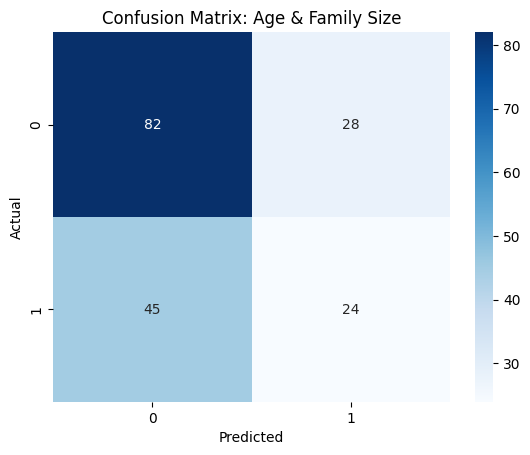

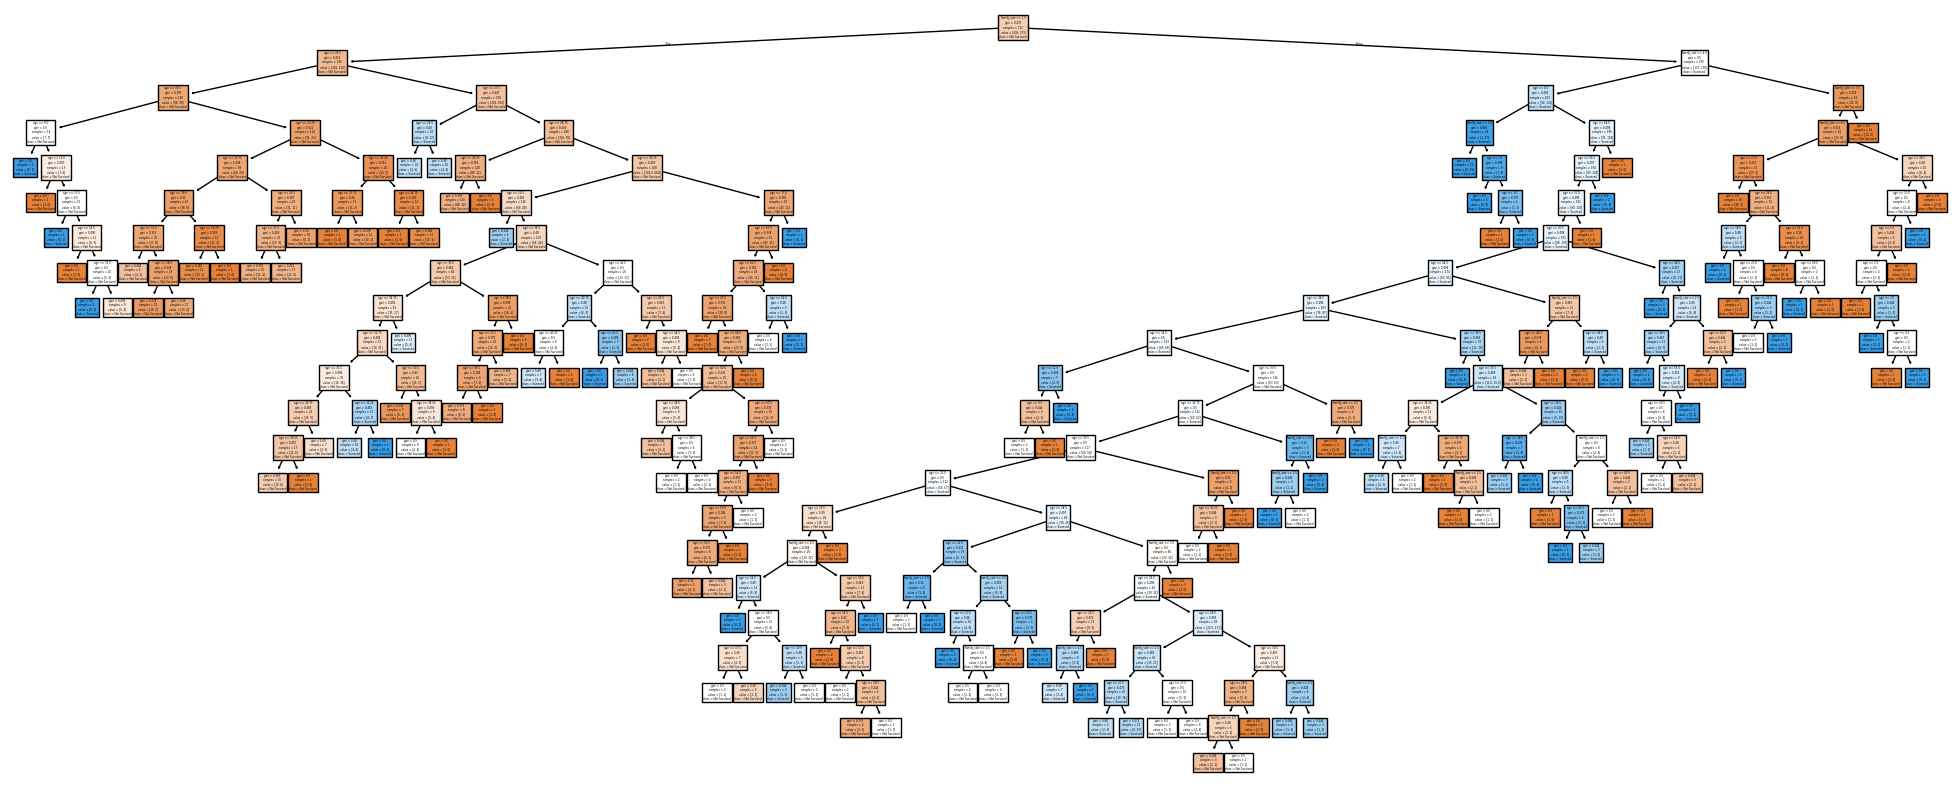

In [30]:
# Case 3: age and family_size together
X = titanic[['age', 'family_size']]
y = titanic['survived']

# Train/Test Split
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

# Train Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Evaluate Performance
y_pred = tree_model.predict(X_test)
print("Results for Decision Tree (Age & Family Size):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix: Age & Family Size")
plt.show()

# Decision Tree Plot
plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()


### Reflection 4:
#### 1. How well did the different cases perform?
Each case performed differently based on the chosen features:

#### Case 1 (Age Only)

** The Decision Tree model trained on age alone had moderate accuracy but struggled to capture the complexity of survival patterns.

** Younger passengers had a higher survival rate, but the model had difficulty making strong predictions based on age alone.

** Performance metrics showed a higher recall, meaning it predicted more survivors correctly but may have misclassified some non-survivors.

#### Case 2 (Fare Only)

** The Decision Tree using fare as the only input showed slightly better performance than age alone.

** Higher fares generally correlated with first-class passengers, who had a higher survival rate.

** Precision was slightly improved compared to age, but it still struggled with generalization.

#### Case 3 (Age & Family Size)

** This case performed the best among the three.

** Adding family_size as a feature improved predictive power because passengers traveling in groups (especially families) had different survival chances.

The F1-score was the highest, meaning the model balanced precision and recall better than the other two cases.

#### 2. Are there any surprising results?

** The fare-only model performed slightly than age alone. This suggests that ticket price was a stronger of survival than age. This makes sense, as lower-class occupants were less likely be prioritized.

#### 3. Which inputs worked better? 

** The combination of age and family_size worked best because it incorporated both individual and group survival factors.

### Section 5. Compare Alternative Models (SVC, NN)

#### Support Vector Machine (SVM)

In [31]:
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))


Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



#### Neural Network (MLP)

In [33]:
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs', max_iter=1000)
nn_model.fit(X_train, y_train)




C:\Projects\applied-ml-kersha\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=(50, 25, 10), max_iter=500, solver='lbfgs')